In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import IsolationForest

In [124]:
# functions TODO: fix error probability 
def generate_dataset(normal_distribution, samples):
    
    # sample 90% from normal dataset
    gaus_dist = random.sample(list(normal_distribution), samples)
    normal_points = ["no" for e in gaus_dist]

    numbers = gaus_dist  # + error_dist 
    labels = normal_points # + outliers 

    # Create df with two columns (number, label)
    df = pd.DataFrame({'number': numbers, 'label_gt': labels})
    df["numeric_label_gt"] = np.where(df['label_gt'] == "yes", -1, 1)

    # shuffle rows
    df = df.sample(frac=1)

    return df


def train_IF(dataset, n_estimators=50, contamination=0.1,max_features=1.0):
    # Train IF
    model=IsolationForest(n_estimators=n_estimators, contamination=contamination, max_features=max_features)
    model.fit(dataset[['number']])

    dataset['scores']=model.decision_function(dataset[['number']])
    dataset['anomaly']=model.predict(dataset[['number']])
    dataset["anomaly"] = np.where(dataset['anomaly']== -1, "yes", "no")

    outliers=dataset.loc[dataset['anomaly']=="yes"]
    outlier_index=list(outliers.index)

    return model, dataset

def anomaly_detection_visualisation(df):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    plt.plot(df['number'],df['scores'], '.')
    plt.title("datapoints and predicted anomaly score")
    plt.xlabel("datapoint (number)")
    plt.ylabel("anomaly score")
    outliers = df[df["anomaly"] == "yes"]
    non_outliers = df[df["anomaly"] == "no"]
    
    plt.title("outliers and non outliers")
    outliers_data = pd.DataFrame({'number': outliers["number"], 'scores': outliers["scores"]})
    sns.scatterplot(x="number", y="scores", data=outliers_data, palette='red', label='outliers');

    normal_data = pd.DataFrame({'number': non_outliers["number"], 'scores': non_outliers["scores"]})
    sns.scatterplot(x="number", y= "scores", data=normal_data, palette='green', label='non outliers');


def plot_histogram_of_datasets(normal_dataset):    
    _, ax = plt.subplots(1,1,figsize=(12,8))

    sns.histplot(normal_dataset, ax=ax, shrink=0.8, stat='count').set(title=f"Non outliers: Data distribution for mean:{normal_dataset.mean()} and std:{normal_dataset.std()}")
    ax.axvline(normal_dataset.mean(), color='green', label='mean')
    ax.legend()

    plt.show()
    print(f'μ_centered ={normal_dataset.mean()}')
    print(f'σ_centered ={normal_dataset.std()}')

#plot_histogram_of_datasets(s_normal_centered,s_normal_shifted)
#anomaly_detection_visualisation(df)

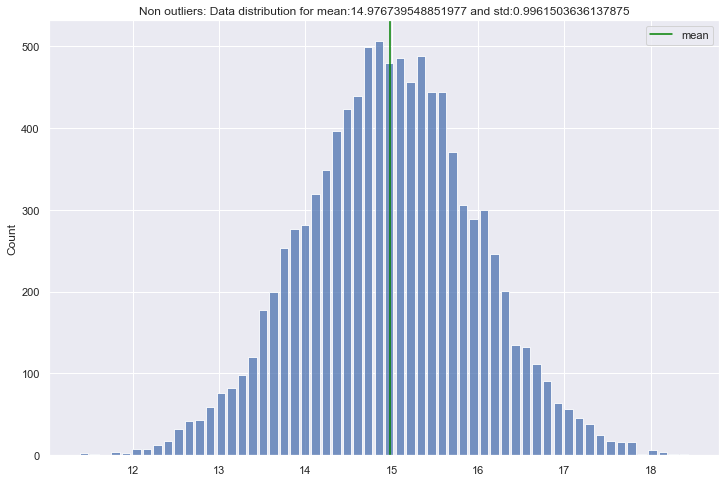

μ_centered =14.976739548851977
σ_centered =0.9961503636137875


/Users/p392827/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


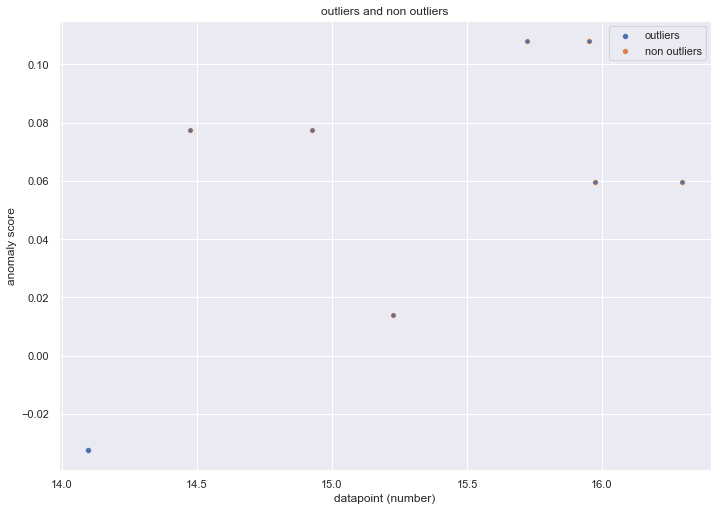

In [125]:

normal_distribution = np.random.normal(15, 1, 10000)

plot_histogram_of_datasets(normal_distribution)

# generate dataset 
ds1 = generate_dataset(normal_distribution, samples=8) # 100

# Train IF 
model, ds1_post_det = train_IF(ds1, n_estimators=2) #  n_estimators=80) # , max_features= 0.2 , contamination=n_anomaleous_samples/n_normal_samples

# Visualization
anomaly_detection_visualisation(ds1_post_det)

# Extracting / calculating hyper space parameters

In [126]:
# List of Estimators (ExtraRegressorTrees)
model.estimators_

[ExtraTreeRegressor(max_depth=3, max_features=1, random_state=1140496948),
 ExtraTreeRegressor(max_depth=3, max_features=1, random_state=153247360)]

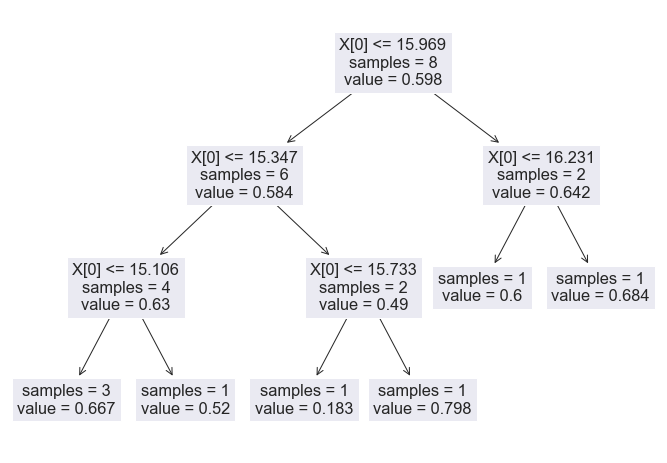

ds1['number']: 5    15.226462
1    16.295492
6    15.723689
7    15.974229
0    15.951107
2    14.475749
3    14.097198
4    14.924473
Name: number, dtype: float64
parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1140496948, 'splitter': 'random'}
number of nodes in Tree:  11
id of the left child of node i or -1 if leaf node: left children:  [ 1  2  3 -1 -1  6 -1 -1  9 -1 -1]
id of the right child of node i or -1 if leaf node: right children:  [ 8  5  4 -1 -1  7 -1 -1 10 -1 -1]
feature used for split:  [ 0  0  0 -2 -2  0 -2 -2  0 -2 -2]
thresholds [15.96919152 15.34653555 15.10595842 -2.         -2.         15.73283829
 -2.         -2.         16.2310368  -2.         -2.        ]


In [127]:

from sklearn.tree import plot_tree

# Selecting first ExtraRegressorTree
first_tree = model.estimators_[0] 

plot_tree(first_tree , impurity=False)
plt.show();

n_nodes = first_tree.tree_.node_count
children_left = first_tree.tree_.children_left
children_right = first_tree.tree_.children_right
feature = first_tree.tree_.feature
thresholds = first_tree.tree_.threshold
indices_samples_tree = model.estimators_samples_[0]
samples_tree = ds1['number'].values[indices_samples_tree]

#print("feature_names_in_:",first_tree.tree_.feature_names_in_)
print("ds1['number']:",ds1['number'])
print("parameters:",first_tree.get_params())
print("number of nodes in Tree: ",n_nodes)
print("id of the left child of node i or -1 if leaf node: left children: ",children_left)
print("id of the right child of node i or -1 if leaf node: right children: ",children_right)
print("feature used for split: ",feature)
print("thresholds",thresholds)

In [128]:
# Thresholds
print(np.unique(thresholds))
print("number of thresholds: ",len(np.unique(thresholds)))

# The subset of drawn samples for each base estimator.
print(f"Number of drawn samples to create the ExtraRegressorTree: {len(model.estimators_samples_[0])} samples_tree = { ds1['number'].values[indices_samples_tree] }")

[-2.         15.10595842 15.34653555 15.73283829 15.96919152 16.2310368 ]
number of thresholds:  6
Number of drawn samples to create the ExtraRegressorTree: 8 samples_tree = [15.22646224 16.29549222 15.7236894  15.97422858 15.9511071  14.47574908
 14.0971975  14.92447268]


# Iterate through decision tree (DFS)

In [129]:
def iterate_through_tree(model, tree_number):
    n_nodes = model.estimators_[tree_number].tree_.node_count
    children_left = model.estimators_[tree_number].tree_.children_left
    children_right = model.estimators_[tree_number].tree_.children_right
    features = model.estimators_[tree_number].tree_.feature
    thresholds = model.estimators_[tree_number].tree_.threshold

    # For example, the arrays feature and threshold only apply to split nodes
    # print("features:", feature)

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)

    # start with the root node id (0) and its depth (0)
    stack = [(0, 0)]  
    rectangle_edges = []

    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split node
        is_split_node = children_left[node_id] != children_right[node_id]

        # If a split node, append left and right children and depth to `stack` so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    return is_leaves, node_depth, children_left, children_right, features, thresholds


In [130]:
is_leaves, node_depth, children_left, children_right, features, thresholds = iterate_through_tree(model, tree_number=0)

print(f"The binary tree structure has {n_nodes} nodes and has the following tree structure:")
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node ".format(
                space=node_depth[i] * "\t",
                node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=thresholds[i],
                right=children_right[i],
            )
        )

The binary tree structure has 11 nodes and has the following tree structure:
node=0 is a split node: go to node 1 if X[:, 0] <= 15.969191522878168 else to node 8.
	node=1 is a split node: go to node 2 if X[:, 0] <= 15.346535552761654 else to node 5.
		node=2 is a split node: go to node 3 if X[:, 0] <= 15.105958415672903 else to node 4.
			node=3 is a leaf node 
			node=4 is a leaf node 
		node=5 is a split node: go to node 6 if X[:, 0] <= 15.732838287287844 else to node 7.
			node=6 is a leaf node 
			node=7 is a leaf node 
	node=8 is a split node: go to node 9 if X[:, 0] <= 16.23103679805398 else to node 10.
		node=9 is a leaf node 
		node=10 is a leaf node 


In [131]:
print("IMPORTANT:")
print("****************************************************************")
print("The arrays feature and threshold only apply to split nodes")
print("-2 means undefined for the thresholds and the features")
print("-1 means leaf node for the children otherwise split node")
print("****************************************************************")
print("thresholds:",thresholds)
print("features:", feature)
print("children_left:", children_left)
print("children_right:", children_right)
print("node_depth:", node_depth)


IMPORTANT:
****************************************************************
The arrays feature and threshold only apply to split nodes
-2 means undefined for the thresholds and the features
-1 means leaf node for the children otherwise split node
****************************************************************
thresholds: [15.96919152 15.34653555 15.10595842 -2.         -2.         15.73283829
 -2.         -2.         16.2310368  -2.         -2.        ]
features: [ 0  0  0 -2 -2  0 -2 -2  0 -2 -2]
children_left: [ 1  2  3 -1 -1  6 -1 -1  9 -1 -1]
children_right: [ 8  5  4 -1 -1  7 -1 -1 10 -1 -1]
node_depth: [0 1 2 3 3 2 3 3 1 2 2]


This is the thresholds list: [15.96919152 15.34653555 15.10595842 -2.         -2.         15.73283829
 -2.         -2.         16.2310368  -2.         -2.        ]
sorted_thresholds: [15.10595842 15.34653555 15.73283829 15.96919152 16.2310368 ]
split node with threshold:  15.969191522878168
split node with threshold:  15.346535552761654
split node with threshold:  15.105958415672903
split node with threshold:  15.732838287287844
split node with threshold:  16.23103679805398
Pattern Space volume: 2.1982947167052718
Pattern Space volume: 0.24057713708875106
Pattern Space volume: 0.3863027345261898
Pattern Space volume: 0.2363532355903235
Pattern Space volume: 0.2618452751758138
Pattern Space volume: 2.1982947167052718


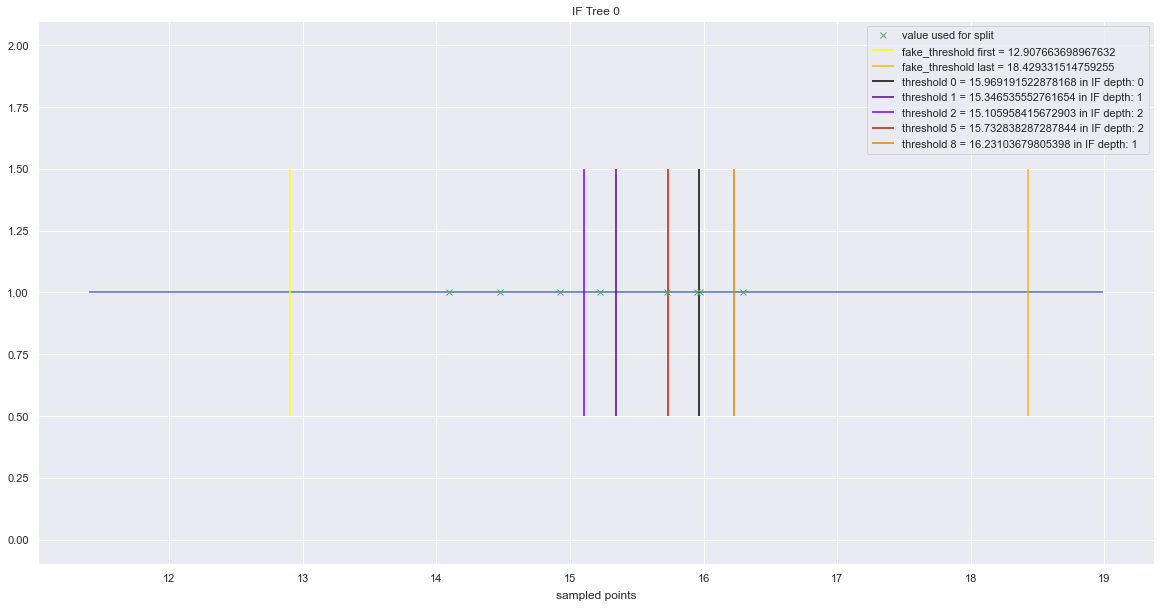

volume_pattern_space_tree:  [2.1982947167052718, 0.24057713708875106, 0.3863027345261898, 0.2363532355903235, 0.2618452751758138, 2.1982947167052718]
This is the thresholds list: [14.24383787 -2.         15.06699168 14.75398621 -2.         -2.
 15.32417457 -2.         -2.        ]
sorted_thresholds: [14.24383787 14.75398621 15.06699168 15.32417457]
split node with threshold:  14.243837865306453
split node with threshold:  15.066991681957852
split node with threshold:  14.753986214359472
split node with threshold:  15.32417457426508
Pattern Space volume: 2.1982947167052718
Pattern Space volume: 0.5101483490530185
Pattern Space volume: 0.31300546759838
Pattern Space volume: 0.25718289230722746
Pattern Space volume: 2.1982947167052718


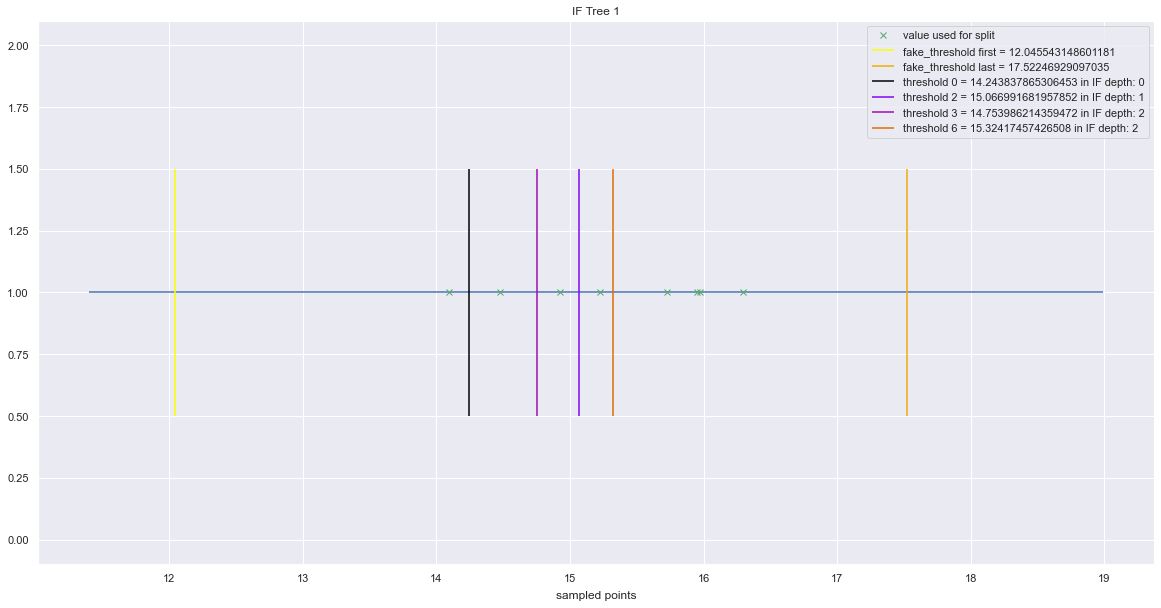

volume_pattern_space_tree:  [2.1982947167052718, 0.5101483490530185, 0.31300546759838, 0.25718289230722746, 2.1982947167052718]


In [132]:
def generate_axis_aligned_hyper_rectangles_forest(model, dataset):
    pattern_space_volumes = []
    cmap = plt.get_cmap('gnuplot')
    min_value = np.min(dataset['number'].values)
    max_value = np.max(dataset['number'].values)
    OFFSET = max_value - min_value 
    for p in range(len(model.estimators_)):

        indices_samples_tree = model.estimators_samples_[p]
        samples_tree = dataset['number'].values[indices_samples_tree]

        is_leaves, node_depth, children_left, children_right, _, thresholds = iterate_through_tree(model, tree_number=p)

        # children_left = model.estimators_[p].tree_.children_left
        # children_right = model.estimators_[p].tree_.children_right
        #print("children_left:", children_left)
        #print("children_right:", children_right)
        # thresholds = model.estimators_[p].tree_.threshold
        
        #print("These is the list of the values chosen to create the tree: ",samples_tree)
        print("This is the thresholds list:",thresholds)

        colors = [cmap(i) for i in np.linspace(0, 1, len((thresholds)))]
        plt.figure(figsize=(20,10))
        plt.hlines(1, min_value-(max_value-min_value)-0.5 ,max_value+(max_value-min_value)+0.5) 

        sorted_thresholds = np.sort(np.unique(thresholds))
        filtered_sorted_thresholds = np.delete(sorted_thresholds, np.where(sorted_thresholds == -2))
        print("sorted_thresholds:",filtered_sorted_thresholds)

        plt.eventplot([filtered_sorted_thresholds[0]-OFFSET], orientation='horizontal', colors=colors[-1], label=f"fake_threshold first = {filtered_sorted_thresholds[0]-OFFSET}")
        plt.eventplot([filtered_sorted_thresholds[-1]+OFFSET], orientation='horizontal', colors=colors[-2], label=f"fake_threshold last = {filtered_sorted_thresholds[-1]+OFFSET}")

        for i in range(0,len(thresholds),1):
            if is_leaves[i] == False:
                print("split node with threshold: ",thresholds[i])
                plt.eventplot([thresholds[i]], orientation='horizontal', colors=colors[i], label=f"threshold {i} = {thresholds[i]} in IF depth: {node_depth[i]}")

        
        volume_pattern_space_tree = []
        # use conv hull to set fake thresholds for the half spaces on the deges
        for c in range(len(filtered_sorted_thresholds)+1):
            if c == 0 or c == len(filtered_sorted_thresholds):
                v = max_value-min_value
            else:
                v = filtered_sorted_thresholds[c] - filtered_sorted_thresholds[c-1]
            print("Pattern Space volume:", v)
            volume_pattern_space_tree.append(v)

        samples_tree_y = [1 for s in samples_tree] 
        plt.plot(samples_tree, samples_tree_y, 'x', color='g', label="value used for split")
        plt.xlabel("sampled points", labelpad=7)
        plt.title(f"IF Tree {p}")
        plt.legend(loc='best')
        plt.show()

        print("volume_pattern_space_tree: ",volume_pattern_space_tree)
        pattern_space_volumes.append(volume_pattern_space_tree)


    return samples_tree, pattern_space_volumes, thresholds
            
sample_values_tree, pattern_space_volumes, thresholds_split_values = generate_axis_aligned_hyper_rectangles_forest(model, dataset=ds1)

## Using decision path to get the list of nodes that were used to isolate the test point

In [133]:
X_test = ds1['number'].values 

node_indicator = model.estimators_[0].decision_path(np.array(X_test).reshape(-1, 1))
leaf_id = model.estimators_[0].apply(np.array(X_test).reshape(-1, 1))

sample_id = 1
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]
node_index

array([ 0,  8, 10], dtype=int32)

In [134]:
def get_list_visited_nodes_decision_tree(model, dataset, estimator):
    X_test = dataset['number']
    decision_trees = model.estimators_
    number_of_decision_trees = len(decision_trees)
    number_of_inputs = len(dataset["number"].values)
    max_tree_depth = model.estimators_[estimator].max_depth
    visited_nodes_per_tree = np.zeros((number_of_inputs,number_of_decision_trees,max_tree_depth+1))
    for t in range(number_of_decision_trees):
        tree = decision_trees[t]
        for sample_id, n in enumerate(dataset["number"].values):
            node_indicator = tree.decision_path(np.array(X_test).reshape(-1, 1))
            node_index = node_indicator.indices[node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]]
            while len(node_index) < max_tree_depth+1:
                node_index = np.append(node_index,[-1])
            visited_nodes_per_tree[sample_id,t] = node_index
            print(f" visited nodes for tree: {t} : {node_index}")

    return visited_nodes_per_tree

visited_nodes_tree = get_list_visited_nodes_decision_tree(model, ds1, estimator=0)

 visited nodes for tree: 0 : [0 1 2 4]
 visited nodes for tree: 0 : [ 0  8 10 -1]
 visited nodes for tree: 0 : [0 1 5 6]
 visited nodes for tree: 0 : [ 0  8  9 -1]
 visited nodes for tree: 0 : [0 1 5 7]
 visited nodes for tree: 0 : [0 1 2 3]
 visited nodes for tree: 0 : [0 1 2 3]
 visited nodes for tree: 0 : [0 1 2 3]
 visited nodes for tree: 1 : [0 2 6 7]
 visited nodes for tree: 1 : [0 2 6 8]
 visited nodes for tree: 1 : [0 2 6 8]
 visited nodes for tree: 1 : [0 2 6 8]
 visited nodes for tree: 1 : [0 2 6 8]
 visited nodes for tree: 1 : [0 2 3 4]
 visited nodes for tree: 1 : [ 0  1 -1 -1]
 visited nodes for tree: 1 : [0 2 3 5]


## Evaluate data points on Pattern Space for one Tree by calculating the number of points that satisfy the pattern space produced by one tree

In [135]:
def populate_pattern_space_tree(ds1, model, tree_number, pattern_space_volumes):

    print(f"tree: {tree_number} -> Number of axis aligned hyper rectangles {len(pattern_space_volumes[tree_number])}")

    number_of_patterns_in_single_space = len(pattern_space_volumes[tree_number])
    patterns_occurences = np.zeros(number_of_patterns_in_single_space)
    
    #print("data points: ",datapoints)

    thresholds = model.estimators_[tree_number].tree_.threshold
    sorted_thresholds = np.sort(np.unique(thresholds))

    # -2 is the value assigned to undefined fields in the ExtraRegressorTree (for thresholds and features)
    filtered_sorted_thresholds = np.delete(sorted_thresholds, np.where(sorted_thresholds == -2)) 
    print("filtered_sorted_thresholds: ",filtered_sorted_thresholds)
    datapoints = ds1["number"].values   
    for c_dp , dp in enumerate(datapoints):
        for c_t , t in enumerate(filtered_sorted_thresholds):
            if dp < t:
                patterns_occurences[c_t] += 1
                #print(f"dp : {dp} in space {c_t}")
                break
            if dp > t and c_t == len(filtered_sorted_thresholds)-1:
                patterns_occurences[-1] += 1
                #print(f"dp : {dp} in space {c_t+1}")
                break

    if np.sum(patterns_occurences) != len(datapoints):
        print("problem: not all points assigned to pattern spaces")

    print("h_list one tree:",patterns_occurences)

    return patterns_occurences, filtered_sorted_thresholds

tree_patterns_occurences, filtered_sorted_thresholds = populate_pattern_space_tree(ds1, model, 0, pattern_space_volumes)

tree: 0 -> Number of axis aligned hyper rectangles 6
filtered_sorted_thresholds:  [15.10595842 15.34653555 15.73283829 15.96919152 16.2310368 ]
h_list one tree: [3. 1. 1. 1. 1. 1.]


In [146]:
def populate_pattern_space_forest(ds1, model, pattern_space_volumes):
      
    print("number of trees (pattern spaces): ",len(pattern_space_volumes))

    number_of_estimators = len(model.estimators_)
    
    tree_patterns_occurences_list = []
    list_of_thresholds = []

    for tree, _ in enumerate(np.arange(0,number_of_estimators,1)):
        tree_patterns_occurences, filtered_sorted_thresholds = populate_pattern_space_tree(ds1, model, tree, pattern_space_volumes)
        tree_patterns_occurences_list.append(tree_patterns_occurences)
        list_of_thresholds.append(filtered_sorted_thresholds)

    return tree_patterns_occurences_list, list_of_thresholds

tree_patterns_occurences_list, list_of_thresholds = populate_pattern_space_forest(ds1, model, pattern_space_volumes)

number of trees (pattern spaces):  2
tree: 0 -> Number of axis aligned hyper rectangles 6
filtered_sorted_thresholds:  [15.10595842 15.34653555 15.73283829 15.96919152 16.2310368 ]
h_list one tree: [3. 1. 1. 1. 1. 1.]
tree: 1 -> Number of axis aligned hyper rectangles 5
filtered_sorted_thresholds:  [14.24383787 14.75398621 15.06699168 15.32417457]
h_list one tree: [1. 1. 1. 1. 4.]


In [159]:
print("tree_patterns_occurences_list (H):",tree_patterns_occurences_list)

tree_patterns_occurences_list (H): [array([3., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 4.])]


# Calculate U_h for the first Tree

In [160]:
def calculate_U_h_tree(volume_pattern_space_tree):
    total_volume = np.sum(volume_pattern_space_tree)
    #print("total volume pattern space H: ",total_volume)
    U_h = volume_pattern_space_tree / total_volume
    #print("U_h: ",U_h)
    return U_h

U_h = calculate_U_h_tree(pattern_space_volumes[0])
U_h 

array([0.39812151, 0.04356965, 0.06996124, 0.04280468, 0.04742141,
       0.39812151])

## Calculate U_h for the forest 

In [166]:
def estimate_U_h(pattern_space_volumes):
    U_h_list = []
    for pattern_space in np.arange(0,len(pattern_space_volumes),1):
        U_h_list.append(calculate_U_h_tree(pattern_space_volumes[pattern_space]))
    return U_h_list

U_h_forest = estimate_U_h(pattern_space_volumes)
U_h_forest

[array([0.39812151, 0.04356965, 0.06996124, 0.04280468, 0.04742141,
        0.39812151]),
 array([0.40137381, 0.09314501, 0.05714984, 0.04695752, 0.40137381])]

# Find the pattern that satisfies a data point in the pattern space of one tree

In [167]:
def find_pattern_index(data_point, filtered_sorted_thresholds):
    pattern = -1
    for c_t , t in enumerate(filtered_sorted_thresholds):
        if data_point < t:
            print(f"dp : {data_point} satisfies pattern space: {c_t}")
            pattern_index = c_t
            break;
        if data_point > t and c_t == len(filtered_sorted_thresholds)-1:
            print(f"dp : {data_point} satisfies last pattern space")
            pattern_index = len(filtered_sorted_thresholds)+1
    
    return pattern_index


print("Thresholds:", filtered_sorted_thresholds)
assgined_pattern_space_index = find_pattern_index(18, filtered_sorted_thresholds)
print("pattern_space_index: ",assgined_pattern_space_index)

Thresholds: [15.10595842 15.34653555 15.73283829 15.96919152 16.2310368 ]
dp : 18 satisfies last pattern space
pattern_space_index:  6


# Ongoing: estimate f_hat using all the trees 

    # Done: f_hat estimation using one estimator (one Tree)    
    # Ongoing: Refactoring code
    # Ongoing: evaluating f_hat on the forest (several trees)
    # Ongoing: Check meaning of plotted values in the Tree (value?)

In [179]:
def f_hat(data_point, H, data_set, U_h_forest, list_of_thresholds):
	'''
	x : datapoint
	H : set of pattern spaces.
    |D| : size of training set.
	U_h : The area of the axis aligned hyper rectangle (pattern) in the pattern space divided by the area of the biggest one.
	list_of_thresholds : list_of_thresholds: contains Thresholds for split nodes in ExtraRegressorTree for each tree.
	'''
	f_hat_list = []
	indeces = []
	print(H)
	print(U_h_forest)
	for tree, _ in enumerate(H): 
		pattern_index = find_pattern_index(data_point, list_of_thresholds[tree])
		f_hat_tree = H[tree][pattern_index] / (len(data_set) * U_h_forest[tree][pattern_index])
		f_hat_list.append(f_hat_tree)

	min_f = np.min(f_hat_list)
	index_min_f = np.argmin(f_hat_list)

	return min_f, index_min_f


print("number of estimators: ", len(H))
print("number of datapoints: ", len(ds1["number"].values))

number of estimators:  2
number of datapoints:  8


In [ ]:

min_f, index_min_f = f_hat(0.5, tree_patterns_occurences_list, ds1["number"].values, U_h_forest, list_of_thresholds)
min_f, index_min_f

# Algorithm PAC_RPAD

    - done: conv hull 
    - done: fix h_list
# TODO:
    - generator instead of for loops 
    - switch to python files instead of notebook 
    - Think about class implementation


In [ ]:
# TODO: How to calculate log(H) 
# TODO: Add time complexity to the calculation of the size of the training dataset (O-Notation)

def rare_pattern_detect(training_dataset, delta, tau, epsilon):
	'''
	delta : failure probability
	tau : detection threshold
	epsilon : tolerance parameter
	'''

	H_hat = estimate_pattern_space(training_dataset)

	# Define Threshold for the estimated pattern probability
	mu = tau + epsilon / 2

	# Not needed cause we already have the dataset: 
	# - calculate the number of samples to draw using sample complexity
	# - N = size_training_dataset_D(delta, epsilon, H) # (1/epsilon**2) * (np.log(H) + np.log(1/delta))
	# - draw training set D of N instances from P
	# - D = generate_training_dataset(N, P)

	results = []
	# for each data point x in training_dataset do:
	for datapoint_counter, x in enumerate(D):
		classification_decision = has_rare_pattern(x,training_dataset,H_hat,mu)
		results.append([x,classification_decision])

	return results


def estimate_pattern_space(training_dataset): # -> list_of_patterns:
	# call IF (training_dataset)
	# TODO: extract the patterns from the estimators (ExtraTreeRegressor list)
    # H = pattern space (list of ExtraTreeRegressor)
    H = model.estimators_

	return H_hat


def has_rare_pattern(x,D,H_hat,mu):
	'''
	x : datapoint
	D : trained set 
	H : pattern space 
	mu : Threshold for the estimated frequency of a pattern to be detected :  tau + epsilon/2
	'''
	U_h = calculate_U_h(x, H)

	# size_D = calculate_size_of_training_data_set(D) # |D| # (length of D)
	for pattern_counter, h in enumerate(H): 

		# estimate the normalized pattern probiblites (f_hat) using the patterns h that that satistfy h(x) == 1  
		estimated_pattern_probability = f_hat(x, h, D, U_h)

		# decision_rule: detect x as anomaleous if any estimated normalized pattern probability is smaller than mu (f_hat(h) < mu)
		if estimated_pattern_probability < mu:
			rare = True # (anomaly)
		else:
			rare = False # (normal)

		decision.append(estimated_pattern_probability, rare)

	return rare


def f_hat(x, h, D, U_h):
	'''
	x : datapoint
	h : trained set 
	|D| : size of training set?
	U_h : The area of the rectangle (pattern) in the pattern space
	'''
	# list of points that satisfy h(x) == 1
	l = [x if h(x) == 1 for x in D]
	f_hat = (len(l)) / (len(D) * U_h)
	return f_hat


def calculate_U_h(x, H):
	"""
	Calculate U(h) based on the area of the hyper rectangle used to isolate the data point
	x : data point
	H : Pattern space
	"""
	return U_h

TabError: inconsistent use of tabs and spaces in indentation (4153942981.py, line 37)

In [ ]:
# TODO: How to calculate log(H) 
# TODO: Add time complexity to the calculation of the size of the training dataset (O-Notation)

def rare_pattern_detect(training_dataset, delta, tau, epsilon):
	'''
	delta : failure probability
	tau : detection threshold
	epsilon : tolerance parameter
	'''

	H_hat = estimate_pattern_space(training_dataset)

	# Define Threshold for the estimated pattern probability
	mu = tau + epsilon / 2

	# Not needed cause we already have the dataset: 
	# - calculate the number of samples to draw using sample complexity
	# - N = size_training_dataset_D(delta, epsilon, H) # (1/epsilon**2) * (np.log(H) + np.log(1/delta))
	# - draw training set D of N instances from P
	# - D = generate_training_dataset(N, P)

	results = []
	# for each data point x in training_dataset do:
	for datapoint_counter, x in enumerate(D):
		classification_decision = has_rare_pattern(x,training_dataset,H_hat,mu)
		results.append([x,classification_decision])

	return results


def estimate_pattern_space(training_dataset): # -> list_of_patterns:
	# call IF (training_dataset)
	# TODO: extract the patterns from the estimators (ExtraTreeRegressor list)
    # H = pattern space (list of ExtraTreeRegressor)
    H = model.estimators_

	return H_hat


def has_rare_pattern(x,D,H_hat,mu):
	'''
	x : datapoint
	D : trained set 
	H : pattern space 
	mu : Threshold for the estimated frequency of a pattern to be detected :  tau + epsilon/2
	'''
	U_h = calculate_U_h(x, H)

	# size_D = calculate_size_of_training_data_set(D) # |D| # (length of D)
	for pattern_counter, h in enumerate(H): 

		# estimate the normalized pattern probiblites (f_hat) using the patterns h that that satistfy h(x) == 1  
		estimated_pattern_probability = f_hat(x, h, D, U_h)

		# decision_rule: detect x as anomaleous if any estimated normalized pattern probability is smaller than mu (f_hat(h) < mu)
		if estimated_pattern_probability < mu:
			rare = True # (anomaly)
		else:
			rare = False # (normal)

		decision.append(estimated_pattern_probability, rare)

	return rare


def f_hat(x, h, D, U_h):
	'''
	x : datapoint
	h : trained set 
	|D| : size of training set?
	U_h : The area of the rectangle (pattern) in the pattern space
	'''
	# list of points that satisfy h(x) == 1
	l = [x if h(x) == 1 for x in D]
	f_hat = (len(l)) / (len(D) * U_h)
	return f_hat


def calculate_U_h(x, H):
	"""
	Calculate U(h) based on the area of the hyper rectangle used to isolate the data point
	x : data point
	H : Pattern space
	"""
	return U_h